In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [8]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [9]:
print(len(messages))

5574


In [12]:
messages[101]

'ham\tOkay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [14]:
for i,j in enumerate(messages[:10]):
    print(str(i)+" "+j+"\n")


0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [15]:
import pandas as pd

In [18]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [19]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
import seaborn as sns

<AxesSubplot:xlabel='label', ylabel='count'>

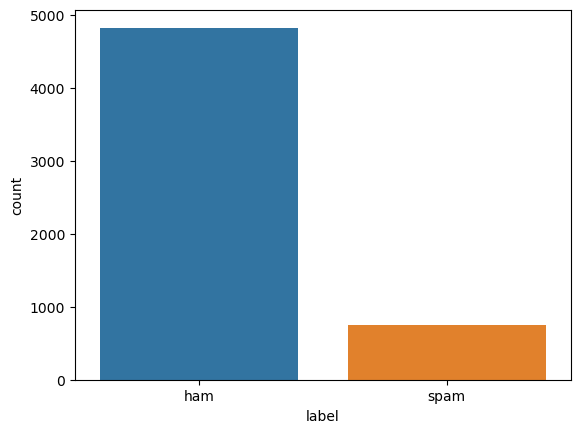

In [22]:
sns.countplot(x = 'label',data=messages)

In [23]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [26]:
messages['length'] = messages['message'].apply(len)

In [27]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='label', ylabel='length'>

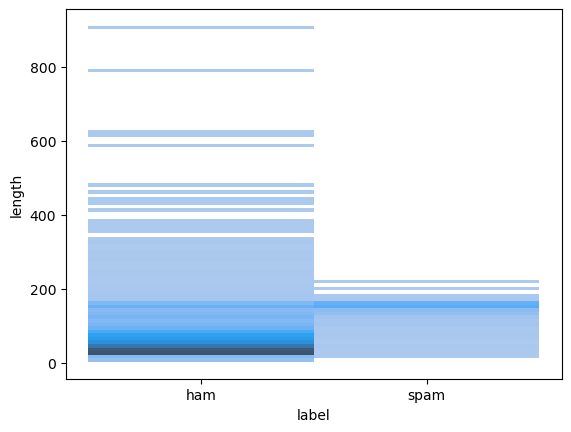

In [29]:
sns.histplot(y=messages['length'],x=messages['label'])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

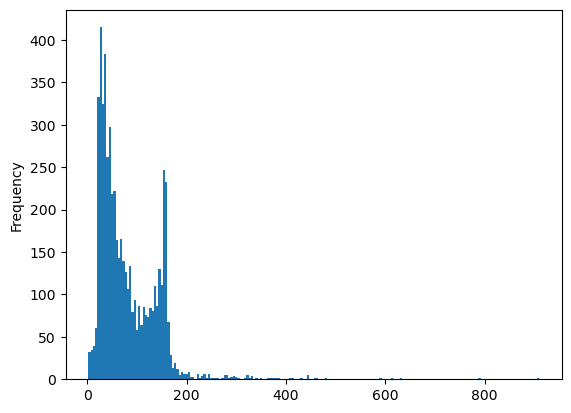

In [32]:
messages['length'].plot.hist(bins=200)

In [33]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [34]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

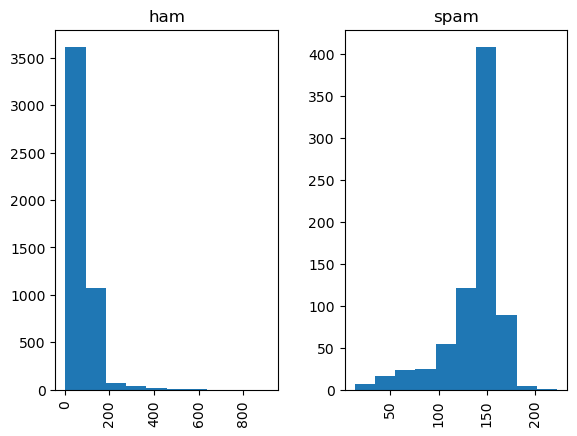

In [36]:
messages.hist(column='length',by='label')

In [37]:
import string

In [41]:
from nltk.corpus import stopwords
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [53]:
print(len(bow_transformer.vocabulary_))

11425


In [54]:
mess4 = messages['message'][3]

In [55]:
mess4

'U dun say so early hor... U c already then say...'

In [57]:
b4 = bow_transformer.transform([mess4])

In [59]:
print(b4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [60]:
bow_transformer.get_feature_names()[4068]

/Users/thiruanand/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'U'

In [61]:
bow_transformer.get_feature_names()[9554]

'say'

In [62]:
messages_bow = bow_transformer.transform(messages['message'])

In [63]:
print(messages_bow.shape)

(5572, 11425)


In [64]:
messages_bow.nnz #times it was non zero

50548

In [65]:
sparsity = (100.0*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))

In [66]:
sparsity

0.07940295412668218

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [71]:
tfidf4 = tfidf_transformer.transform(b4)

In [73]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [74]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['University']]

8.93254160700959

In [75]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [80]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [83]:
messages['label'][3]

'ham'

In [84]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [85]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)


In [89]:
from sklearn.pipeline import Pipeline

In [90]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',MultinomialNB())
])

In [92]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x16b902670>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [93]:
pred = pipeline.predict(msg_test)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1437
        spam       1.00      0.71      0.83       235

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

